# Fake news detection

Preprocess logs for line graphs

In [6]:
import re
import os

In [2]:
def extract_data(filepath, info_dict):
    with open(filepath) as f:
        lines = f.readlines()
        for line in lines:
            if re.match('Epoch.*', line):
                info_dict['Accuracy'].append(float(line.split()[9]))
                info_dict['Time'].append(float(line.split()[4]))
    return info_dict

def print_data(info_dict):
    print(f"Accuracy: {info_dict['Accuracy']}, lenght = {len(info_dict['Accuracy'])}")
    print(f"Accuracy: {info_dict['Time']}, lenght = {len(info_dict['Time'])}")

In [3]:
classbert_fp16_25_32_1  = {'Accuracy': [], 'Time': []}
classbert_fp16_25_32_4  = {'Accuracy': [], 'Time': []}
deepbert_fp16_25_32_1   = {'Accuracy': [], 'Time': []}
classbert_fp16_100_32_1 = {'Accuracy': [], 'Time': []}
deepbert_fp16_25_32_4   = {'Accuracy': [], 'Time': []}
classbert_fp32_50_64_4  = {'Accuracy': [], 'Time': []}
classbert_fp16_50_64_6  = {'Accuracy': [], 'Time': []}
classbert_fp16_100_32_4 = {'Accuracy': [], 'Time': []}

classbert_fp16_25_32_1  = extract_data('report/logs/first_train/half_classbert_25_32batch_1.log',
                                       classbert_fp16_25_32_1)
classbert_fp16_25_32_4  = extract_data('report/logs/first_train/half_classbert_25_32batch_4.log',
                                       classbert_fp16_25_32_4)
deepbert_fp16_25_32_1   = extract_data('report/logs/first_train/half_deepbert_25_32batch_1.log',
                                       deepbert_fp16_25_32_1)
deepbert_fp16_25_32_4   = extract_data('report/logs/first_train/half_deepbert_25_32batch_4.log',
                                       deepbert_fp16_25_32_4)
classbert_fp32_50_64_4  = extract_data('report/logs/23rd_march_train/float_classbert_50_64batch_4.log',
                                       classbert_fp32_50_64_4)
classbert_fp16_50_64_6  = extract_data('report/logs/23rd_march_train/half_classbert_50_64batch_6.log',
                                       classbert_fp16_50_64_6)
classbert_fp16_100_32_1 = extract_data('report/logs/20th_train/half_classbert_100_32batch_1.log',
                                       classbert_fp16_100_32_1)
classbert_fp16_100_32_4 = extract_data('report/logs/20th_train/half_classbert_100_32batch_4.log',
                                       classbert_fp16_100_32_4)

In [ ]:
%pip install gdown

In [12]:
if not os.path.isfile('report/models/best_models.zip'):
    os.system('mkdir report/models/')
    os.chdir('report/models/')
    os.system('gdown https://drive.google.com/uc?id=1rUE1Pg3nlxaF5dLBU6OP3k2vqsZX9zcN')
    os.system('unzip best_models.zip')
    os.chdir('../../')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1rUE1Pg3nlxaF5dLBU6OP3k2vqsZX9zcN
From (redirected): https://drive.google.com/uc?id=1rUE1Pg3nlxaF5dLBU6OP3k2vqsZX9zcN&confirm=t&uuid=17572c02-6298-4ef1-a15d-7ca47fa40a49
To: /home/habkaffee/nlp_lab5/report/models/best_models.zip
100%|██████████| 487M/487M [00:07<00:00, 64.0MB/s] 


Archive:  best_models.zip
  inflating: model_Model_ClassBertModel_Last_states_4_optim_Adam_acc_0.9261_epoch_48.ckpt  
  inflating: 20th_train/model_Model_ClassBertModel_Last_states_4_optim_Adam_acc_0.9100_epoch_73.ckpt  
  inflating: prev_out/Model: <class 'src.model.ClassBertModel'>, Last states: 4, Feature extractor: <class 'transformers.models.distilbert.modeling_distilbert.DistilBertModel'>_acc_0.8111_epoch_25.ckpt  


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Classbert_fp16_100_epocs_laststages_4')

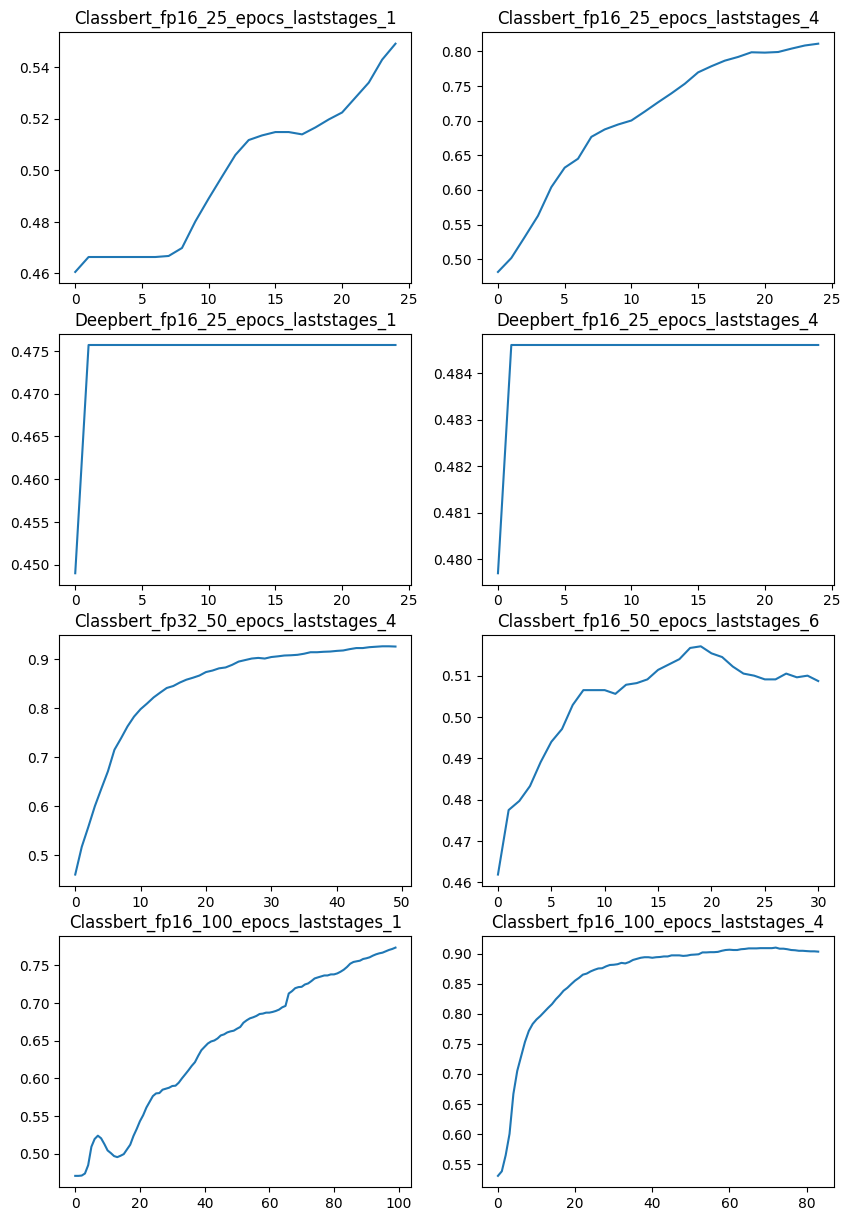

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(10,15))
axs[0, 0].plot(classbert_fp16_25_32_1['Accuracy'])
axs[0, 0].set_title('Classbert_fp16_25_epocs_laststages_1')
axs[0, 1].plot(classbert_fp16_25_32_4['Accuracy'])
axs[0, 1].set_title('Classbert_fp16_25_epocs_laststages_4')
axs[1, 0].plot(deepbert_fp16_25_32_1['Accuracy'])
axs[1, 0].set_title('Deepbert_fp16_25_epocs_laststages_1')
axs[1, 1].plot(deepbert_fp16_25_32_4['Accuracy'])
axs[1, 1].set_title('Deepbert_fp16_25_epocs_laststages_4')
axs[2, 0].plot(classbert_fp32_50_64_4['Accuracy'])
axs[2, 0].set_title('Classbert_fp32_50_epocs_laststages_4')
axs[2, 1].plot(classbert_fp16_50_64_6['Accuracy'])
axs[2, 1].set_title('Classbert_fp16_50_epocs_laststages_6')
axs[3, 0].plot(classbert_fp16_100_32_1['Accuracy'])
axs[3, 0].set_title('Classbert_fp16_100_epocs_laststages_1')
axs[3, 1].plot(classbert_fp16_100_32_4['Accuracy'])
axs[3, 1].set_title('Classbert_fp16_100_epocs_laststages_4')